# Introduction
Regression analysis is a supervised learning technique to estimate the relationships between independent and dependent variables.

# Linear Regression
Linear regression is a form of regression analysis in which one finds a linear function which attempts to fit the data based on some criterion.

Its form is given by $$y=X\beta+\epsilon$$, where:
- $X$ is a matrix of the independent variables in row vector form.
- $y$ is a column vector of the observed values corresponding to the independent variables at that row.
- $\beta$ is a $p+1$-dimensional parameter vector to be estimated, where $p$ is the number of observations.
- $\epsilon$ is the error term.

Usually, fitting a linear model to some data requires estimating $\beta$ such that the error term $\epsilon=y-X\beta$ is minimized. Often the sum of squared errors, $||\epsilon||_2^2$ is used as a target for minimization.

## Demo on Iris Data

First, let's get a look at our data.

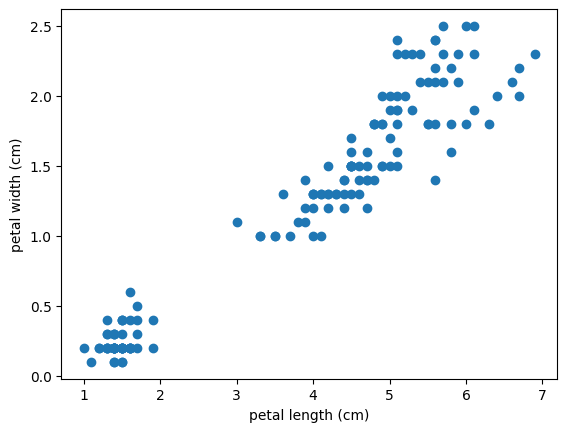

In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris(as_frame = True)

X = iris.data['petal length (cm)']
Y = iris.data['petal width (cm)']

import matplotlib.pyplot as plt

plt.scatter(X, Y)

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

Then, let's estimate a best fit line for our data.

Note that we need to reshape the variable array from $1\times p$ to $p\times 1$ because `model.fit` expects an $X$ and $Y$ of shape $n\times p$, where $p$ is the number of observations and $n$ is the number of variables ($n=1$ always for $Y$).

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X.values.reshape(-1, 1),
          Y.values.reshape(-1, 1))

Y_pred = model.predict(X.values.reshape(-1, 1))

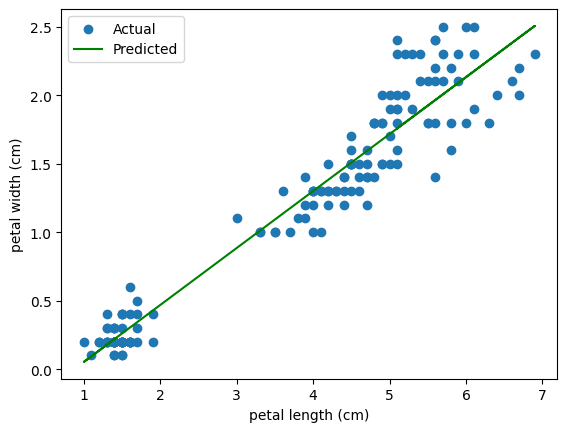

In [ ]:
plt.scatter(X, Y, label = 'Actual')
plt.plot(X, Y_pred, label = 'Predicted', c = 'g')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.legend()
plt.show()

## Mean Squared Error
scikit-learn provides tools for us to measure our model's final mean squared error.

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y, Y_pred)

0.04206730919499318

## More Variables
Here, we just used a single variable to predict another. Let's try using more variables to predict the petal width.

Note that we don't need to reshape `X.values` because it is already of shape $n\times p$.

In [ ]:
X = iris.data[['petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']]
Y = iris.data['petal width (cm)']

In [ ]:
model = linear_model.LinearRegression()
model.fit(X.values,
          Y.values.reshape(-1, 1))

Y_pred = model.predict(X.values)

mean_squared_error(Y, Y_pred)

0.03586865113818455

Looks like we do slightly better.

# Logistic Regression
Logistic regression is a form of regression where the dependent variable is a probability representing a binary classifier.

The following is the logistic function that generates values from 0 to 1:
$$F(x)=\frac{1}{1+e^{-(\beta_0+\beta_1x)}}$$, where:
- $F(x)\in[0,1]$ is the dependent variable.
- $x\in\mathbb{R}$ is the independent variable.
- $\beta_0, \beta_1$ are parameters to be learned through logistic regression.

## Demo of Setosa/Versicolor Binary Classification

Get data

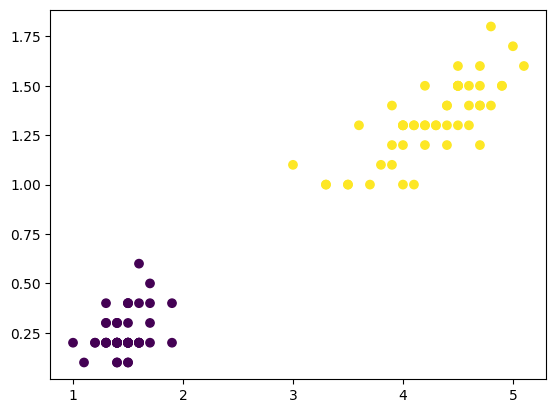

In [ ]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].loc[(iris.target == 0) | (iris.target == 1)]
Y = iris.target.loc[(iris.target == 0) | (iris.target == 1)]

plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c = Y)

plt.show()

Perform logistic regression

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

Visualize results

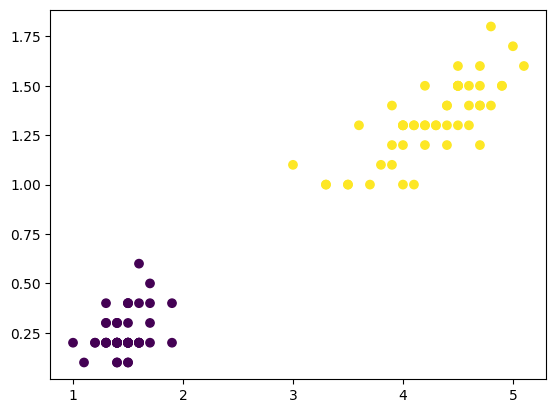

In [ ]:
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c = Y_pred)

## Classification Report
scikit-learn provides a classification report tool which reports some classification metrics.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



The model does perfectly!

## More Variables
Let's try using all available variables for logistic regression.

In [ ]:
X = iris.data.loc[(iris.target == 0) | (iris.target == 1)]
Y = iris.target.loc[(iris.target == 0) | (iris.target == 1)]

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Still, the model does perfectly.

# References
<a id="1">[1]</a>
S. Madhavan. (2015). Mastering Python for Data Science. Available: https://github.com/AmandaZou/Data-Science-books-/blob/master/Mastering%20Python%20for%20Data%20Science.pdf

<a id="2">[2]</a>
A. Boschetti, L. Massaron. (2015). Python Data Science Essentials. Available: https://aaronyeo.org/books_/Data_Science/Python/Python%20Data%20Science%20Essentials.pdf